In [1]:
import numpy as np
import pandas as pd

from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import SVD, KNNWithZScore, KNNBasic
from surprise import Dataset
from surprise import accuracy
from surprise import dump
import matplotlib.pyplot as plt
import matplotlib

from relation_build import *
%matplotlib inline

C:\Users\LT\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
predictions, algo = dump.load(r"librarydata\model.md")

In [3]:
predictions_knn, algo_knn = dump.load(r"librarydata\model_knn.md")

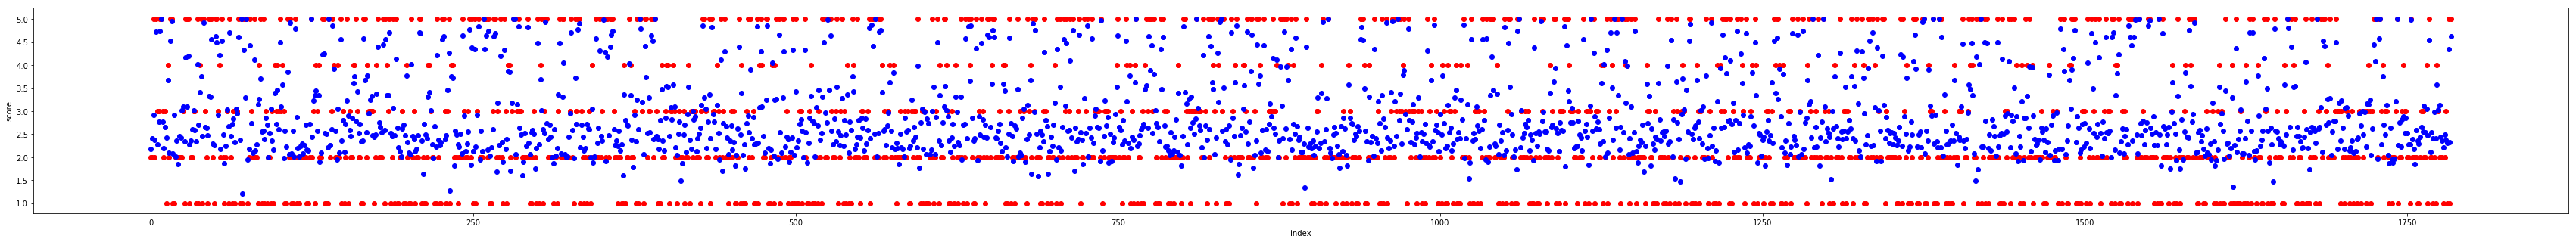

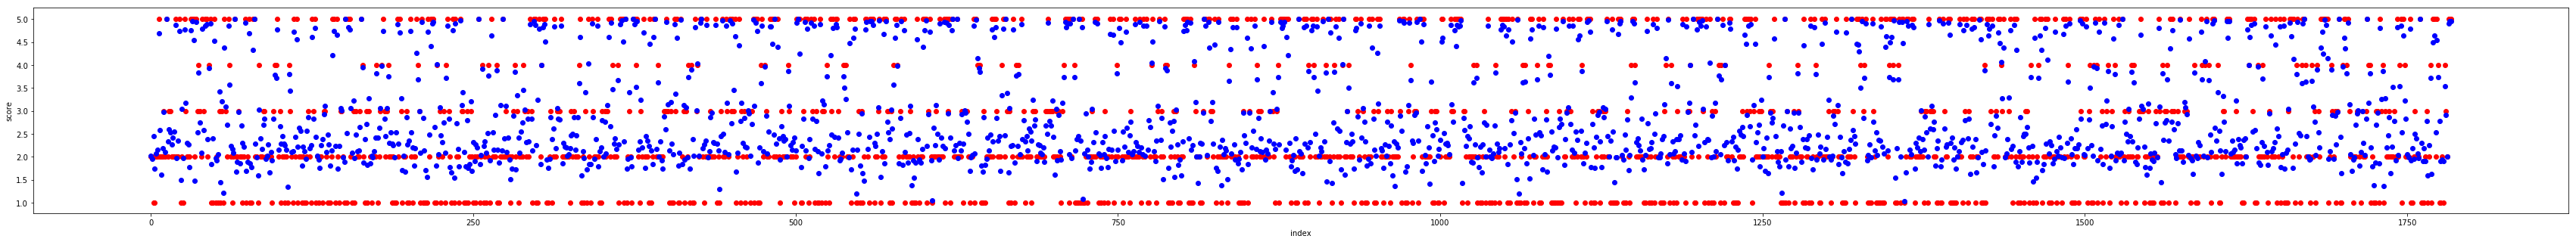

In [4]:
x = range(0,len(predictions_knn))
y_ui = [x.r_ui for x in predictions_knn]
y_est = [x.est for x in predictions_knn]
plt.figure(0,figsize=(60,5))
plt.scatter(x, y_ui, c='red')
plt.scatter(x, y_est, c='blue')
plt.xlabel("index")
plt.ylabel("score")
# plt.legend(loc=2)
plt.show()
plt.close(0)
x = range(0,len(predictions))[:]
y_ui = [x.r_ui for x in predictions][:]
y_est = [x.est for x in predictions][:]
plt.figure(1,figsize=(60,5))
plt.scatter(x, y_ui, c='red')
plt.scatter(x, y_est, c='blue')
plt.xlabel("index")
plt.ylabel("score")
# plt.legend(loc=2)
plt.show()

In [5]:
book_count = pd.read_csv(r"librarydata\book_count.csv", encoding='utf-8', index_col=0)

In [2]:
final_data = pd.read_csv(r"librarydata/rename.csv", encoding='utf-8',index_col=0)

In [7]:
user_item = pd.read_csv(r"librarydata/user_item_rename.csv", encoding='utf-8',index_col=0)

In [ ]:
# user_item.to_csv(r"librarydata/user_item_rename.csv", encoding='utf-8')

In [16]:
rand_book = np.random.randint(low=0, high=12499)
print("user index:", user_item["name"][rand_book])

book_nearest = 3
recommd_user_prev = algo_knn.get_neighbors(8198, k=book_nearest)
recommd_user = relation_avg(rand_book,k=book_nearest)

user index: 5664
[23, 27, 35, 58, 64, 112]
[23, 27, 35]
[(0, 100), (0, 100), (0, 100)]
[(64, 0.5150521385716006), (27, 0.6483716360158605), (112, 0.5598079106217236)]


In [10]:
this_user = set(eval(user_item["bookname"][rand_book]))
print(this_user)
for i in this_user:
    print("《{}》".format(book_count["bookname"][i],sep=" "))
recommd_book = set()
print()
for i in recommd_user:
    books = set(eval(user_item["bookname"][i]))
    print(books)
    for book in books:
        recommd_book.add(book)
        print("《{}》".format(book_count["bookname"][book], sep=" "))
    print()

{27074, 27075, 20610, 16357, 15482, 34311, 20612, 16234, 2064, 16304, 39507, 3032, 2937, 33018, 15483, 2938, 25983}
《情人箭.上》
《情人箭.下》
《大学生心理健康》
《单片机的C语言应用程序设计-第3版》
《剑毒梅香.上》
《欢乐英雄.下》
《大学生心理健康:走向和谐与适应》
《单片机原理与应用技术》
《AutoCAD 2007机械绘图实战从入门到精通》
《单片机应用实例开发》
《电工技术（电工学Ⅰ）常见题型解析及模拟题》
《C语言程序设计教程》
《C语言复习指南与题解》
《机械设计》
《剑毒梅香.下》
《C语言大学实用教程》
《彩环曲》

{46145, 14982, 42182, 49352, 8424, 28344, 24270, 32059, 34679, 34616, 48315, 39036, 49341, 44702, 22431}
《莫扎特》
《凡·高》
《米开朗琪罗》
《达尔文》
《一诺千金:谈友谊》
《拉斐尔》
《巨龙时代》
《最后的守护者》
《氏族之王》
《毕加索》
《贝多芬》
《电动机检修》
《达·芬奇》
《肖邦》
《安徒生》

{7257}
《Visual Basic程序设计题典》

{20738, 41358, 15503, 26258, 8595, 14100, 34075, 5405, 49182, 13982, 49183, 26269, 20388, 33960, 5041, 20805, 14151, 36171, 26187, 37325, 26189, 33362, 36182, 39256, 26204, 7903, 28524, 28525, 34036, 20734}
《大学英语6级真题考点精解》
《科技信息检索与利用》
《力学测试技术基础》
《微机原理与接口技术习题与解析》
《三级PC技术考试考点分析与全真训练》
《全国计算机等级考试教程.PC技术 (三级):新大纲版》
《概率论与数理统计附册:学习辅导与习题选解:浙大·第四版》
《Photoshop CS4中文版完全自学教程》
《软式排球、沙滩排球、气排球理论与方法》
《全国计算机等级考试三级教程:2009年版.PC技术》
《软式排球和沙滩排球训练指

In [11]:
def sort_key(obj):
    return obj[1]

In [12]:
score_rank = set()
for i in recommd_book:
    uid=rand_book
    iid=i
    pred = algo.predict(uid, iid, verbose=True)
    score_rank.add((pred.iid,pred.est))
score_rank = list(score_rank)
score_rank.sort(key=sort_key,reverse=True)

user: 7142       item: 20738      r_ui = None   est = 1.82   {'was_impossible': False}
user: 7142       item: 14982      r_ui = None   est = 1.65   {'was_impossible': False}
user: 7142       item: 41358      r_ui = None   est = 1.22   {'was_impossible': False}
user: 7142       item: 15503      r_ui = None   est = 1.49   {'was_impossible': False}
user: 7142       item: 26258      r_ui = None   est = 3.21   {'was_impossible': False}
user: 7142       item: 8595       r_ui = None   est = 2.17   {'was_impossible': False}
user: 7142       item: 14100      r_ui = None   est = 3.03   {'was_impossible': False}
user: 7142       item: 34075      r_ui = None   est = 4.08   {'was_impossible': False}
user: 7142       item: 5405       r_ui = None   est = 1.63   {'was_impossible': False}
user: 7142       item: 44702      r_ui = None   est = 1.90   {'was_impossible': False}
user: 7142       item: 22431      r_ui = None   est = 1.82   {'was_impossible': False}
user: 7142       item: 49182      r_ui = No

In [13]:
print(score_rank[:10])
if len(score_rank)>10:
    for i in score_rank[:10]:
        print("《{}》".format(book_count["bookname"][i[0]]))
else:
    for i in score_rank:
        print("《{}》".format(book_count["bookname"][i[0]]))

[(36171, 4.375919137489797), (33960, 4.3520591074079285), (37325, 4.191590293160754), (39256, 4.115403967330885), (34075, 4.0830432636391585), (34036, 4.040396854341854), (33362, 3.9742902541381295), (26258, 3.208463279442352), (36182, 3.200855319742448), (24270, 3.1248975964625547)]
《淘金式巧攻大学英语词汇.6级分册-第2版》
《概率论与数理统计》
《物理学教程习题详解》
《电子技术基础模拟部分(第五版)全程导学及习题全解》
《概率论与数理统计附册:学习辅导与习题选解:浙大·第四版》
《概率论与数理统计学习指导与典型题详解》
《材料力学实验》
《微机原理与接口技术习题与解析》
《淘金高阶6级考试巅峰训练:MP3版》
《巨龙时代》


In [20]:
this_user = set(eval(user_item["bookname"][rand_book]))
# print(this_user)
# for i in this_user:
#     print("《{}》".format(book_count["bookname"][i],sep=" "))
recommd_book = set()
# print()
for i in recommd_user_prev:
    books = set(eval(user_item["bookname"][i]))
#     print(books)
    for book in books:
        recommd_book.add(book)
#         print("《{}》".format(book_count["bookname"][book], sep=" "))
#     print()
    
score_rank = set()
for i in recommd_book:
    uid=rand_book
    iid=i
    pred = algo.predict(uid, iid, verbose=False,)
    score_rank.add((pred.iid,pred.est))
score_rank = list(score_rank)
score_rank.sort(key=sort_key,reverse=True)

print(score_rank[:10])
if len(score_rank)>10:
    for i in score_rank[:10]:
        print("《{}》".format(book_count["bookname"][i[0]]))
else:
    for i in score_rank:
        print("《{}》".format(book_count["bookname"][i[0]]))

[(6932, 4.702266774555872), (12526, 4.653358379390308), (13578, 4.482908182001887), (1206, 4.357401904582201), (36211, 4.203960830208786), (5155, 3.532823068442244), (4222, 3.1749637027083524), (18820, 3.0602528337855603), (4737, 3.051165715433737), (4738, 2.971347834927003)]
《VC++深入详解》
《会计学》
《傲慢与偏见》
《51单片机编程基础与开发实例详解》
《深入浅出C程序语言设计》
《PLC控制系统编程与实现任务解析》
《Java基础教程》
《国际金融》
《MSP430单片机常用模块与综合系统实例精讲》
《MSP430单片机应用系统开发典型实例》
